In [62]:
# All the dependencies needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy
import json
import scipy.stats as sts

In [63]:
# our given file
original_file = "cities.csv"

In [64]:
# range for latitude and longitude
range_latitude = (-90, 90)
range_longitude = (-180, 180)

In [65]:
# List that will hold latitudes & longitudes, and a list of cities
latitude_longitude_list = []
cities_list = []

In [66]:
# this will create a set of random latitudes and longitudes
latitudes = np.random.uniform(range_latitude[0], range_latitude[1], size=1500)
longitudes = np.random.uniform(range_longitude[0], range_longitude[1], size=1500)
latitude_longitude_list = zip(latitudes, longitudes)

In [67]:
# for loop that will get the nearest city for latitude and longitude
for latitude_and_longitude in latitude_longitude_list:
    city = citipy.nearest_city(latitude_and_longitude[0], latitude_and_longitude[1]).city_name
    
    # every unique city will be added to cities list
    if city not in cities_list:
        cities_list.append(city)
        
len(cities_list)

628

In [68]:
# we will query the url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=8ae6e4d8469594724850ae886b985ce2&units=imperial&q='

In [69]:
# making a request, and getting weather data
weather_request = requests.get(query_url + city)

# we want to make the data look better with dumps in order to see what we want to use for our lists that will store data
request_json = weather_request.json()
print(json.dumps(request_json, indent = 4))

{
    "coord": {
        "lon": -82.5271,
        "lat": 33.194
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 74.84,
        "feels_like": 75.51,
        "temp_min": 71.11,
        "temp_max": 78.67,
        "pressure": 1015,
        "humidity": 74,
        "sea_level": 1015,
        "grnd_level": 999
    },
    "visibility": 10000,
    "wind": {
        "speed": 9.15,
        "deg": 208,
        "gust": 18.84
    },
    "rain": {
        "1h": 0.4
    },
    "clouds": {
        "all": 100
    },
    "dt": 1627962083,
    "sys": {
        "type": 1,
        "id": 2827,
        "country": "US",
        "sunrise": 1627901038,
        "sunset": 1627950517
    },
    "timezone": -14400,
    "id": 4231997,
    "name": "Avera",
    "cod": 200
}


In [70]:
# these are the list that will store our data
cityName = []
latitude = []
longitude = []
maxTemperature = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []

In [71]:
# this will be used as a counter
data_record = 1

In [72]:
# for loop that will go through a list of cities and collect data
for city in cities_list:
    try:
        response = requests.get(query_url + city).json()
        cityName.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        maxTemperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        cityRecord = response["name"]
        print(f"Data Record {data_record} | {cityRecord}") 
        
        
        # Increase Processing Record Counter by 1 For Each Loop
        data_record += 1
        
    except:
        print("No city was found") 
    continue

Data Record 1 | Kapoeta
Data Record 2 | Nueva Granada
Data Record 3 | Maroantsetra
Data Record 4 | Omboué
Data Record 5 | Gornopravdinsk
Data Record 6 | Labuhan
Data Record 7 | Saint Paul Harbor
No city was found
Data Record 8 | Qiongshan
Data Record 9 | Kapaa
Data Record 10 | Jacareacanga
Data Record 11 | Great Bend
Data Record 12 | Wahpeton
No city was found
Data Record 13 | Chauk
Data Record 14 | Vaini
Data Record 15 | Bethel
Data Record 16 | Broome
Data Record 17 | Kajaani
Data Record 18 | Mataura
Data Record 19 | Måløy
Data Record 20 | Kargasok
Data Record 21 | Bredasdorp
Data Record 22 | Santa Isabel Rio Negro
Data Record 23 | Arraial do Cabo
Data Record 24 | Pajapan
Data Record 25 | Upernavik
Data Record 26 | Pangani
Data Record 27 | Klaksvík
No city was found
Data Record 28 | Port Alfred
Data Record 29 | Russell
No city was found
Data Record 30 | Bluff
Data Record 31 | Saskylakh
Data Record 32 | Ol'ga
Data Record 33 | Atuona
Data Record 34 | Chui
Data Record 35 | Praia
Data Rec

Data Record 286 | Gwembe
Data Record 287 | Agüimes
Data Record 288 | Lavrentiya
Data Record 289 | Richmond
Data Record 290 | Yilan
Data Record 291 | Bontang
Data Record 292 | Port Hedland
Data Record 293 | Kilindoni
No city was found
Data Record 294 | Mandera
Data Record 295 | Catalina Foothills
Data Record 296 | Izberbash
Data Record 297 | Pevek
No city was found
Data Record 298 | Los Llanos de Aridane
Data Record 299 | Bendigo
Data Record 300 | Santa Marta
No city was found
Data Record 301 | Kula
Data Record 302 | Rundu
Data Record 303 | Sheridan
Data Record 304 | Bairiki Village
Data Record 305 | Isangel
Data Record 306 | Grindavik
Data Record 307 | Boddam
Data Record 308 | Tiksi
Data Record 309 | Clyde River
Data Record 310 | Juegang
Data Record 311 | Sinegor'ye
Data Record 312 | Kosonsoy
Data Record 313 | Livanates
Data Record 314 | Macao
Data Record 315 | Phan Thiet
Data Record 316 | Copiapó
Data Record 317 | São Félix do Xingu
Data Record 318 | Road Town
Data Record 319 | Makaro

Data Record 569 | Inhambane
No city was found
Data Record 570 | Garcia Hernandez
Data Record 571 | Auki
Data Record 572 | Forbes
Data Record 573 | Qingdao
Data Record 574 | Kibala


In [73]:
# we are making a dataframe from the data collected
weather_data_dictionary = {
    "City": cityName,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": maxTemperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windSpeed,
    "Country": country,
    "Date": date,
}

weather_dataframe = pd.DataFrame(weather_data_dictionary)
weather_dataframe.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [74]:
# the current dataframe
weather_dataframe

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapoeta,4.7717,33.5903,72.75,59,67,4.85,SS,1627962088
1,Nueva Granada,9.8017,-74.3930,74.97,93,99,6.22,CO,1627962088
2,Maroantsetra,-15.4333,49.7333,65.10,87,46,3.53,MG,1627962088
3,Omboué,-1.5746,9.2618,73.76,89,96,4.21,GA,1627961857
4,Gornopravdinsk,60.0500,69.9000,57.49,96,100,7.05,RU,1627962089
...,...,...,...,...,...,...,...,...,...
569,Garcia Hernandez,9.6144,124.2946,85.46,71,100,15.68,PH,1627962251
570,Auki,-8.7676,160.7034,82.80,68,86,3.44,SB,1627962251
571,Forbes,-33.3833,148.0167,51.62,67,83,13.22,AU,1627962251
572,Qingdao,36.0986,120.3719,85.60,62,75,4.47,CN,1627962252


In [75]:
# getting rid of data that has humidity more than 100
humidity_dataframe= weather_dataframe.loc[weather_dataframe["Humidity"] >=100]
humidity_dataframe

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
51,Cape Town,-33.9258,18.4232,57.11,100,0,4.61,ZA,1627961825
56,Marystown,47.1666,-55.1483,62.85,100,100,3.00,CA,1627962103
239,Salalah,17.0151,54.0924,77.09,100,90,6.91,OM,1627962155
308,Clyde River,70.4692,-68.5914,34.03,100,90,5.75,CA,1627962175
349,Iqaluit,63.7506,-68.5145,44.33,100,90,5.99,CA,1627962186
367,Edson,53.5835,-116.4356,66.34,100,90,0.00,CA,1627962191
426,Balikpapan,-1.2675,116.8289,77.99,100,40,3.44,ID,1627962208
543,San Ignacio,17.1561,-89.0714,73.54,100,0,0.00,BZ,1627962242


In [76]:
# dataframe with humidity that is not 100%
humidity_dataframe_cleaned= weather_dataframe.loc[(weather_dataframe["Humidity"] < 100)]
humidity_dataframe_cleaned

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapoeta,4.7717,33.5903,72.75,59,67,4.85,SS,1627962088
1,Nueva Granada,9.8017,-74.3930,74.97,93,99,6.22,CO,1627962088
2,Maroantsetra,-15.4333,49.7333,65.10,87,46,3.53,MG,1627962088
3,Omboué,-1.5746,9.2618,73.76,89,96,4.21,GA,1627961857
4,Gornopravdinsk,60.0500,69.9000,57.49,96,100,7.05,RU,1627962089
...,...,...,...,...,...,...,...,...,...
569,Garcia Hernandez,9.6144,124.2946,85.46,71,100,15.68,PH,1627962251
570,Auki,-8.7676,160.7034,82.80,68,86,3.44,SB,1627962251
571,Forbes,-33.3833,148.0167,51.62,67,83,13.22,AU,1627962251
572,Qingdao,36.0986,120.3719,85.60,62,75,4.47,CN,1627962252


In [77]:
# exporting data frame to 
humidity_dataframe_cleaned.to_csv("clean_cities_data.csv", encoding ="utf-8", index=False)

Text(0.5, 1.0, 'Max Temperature vs Latitude')

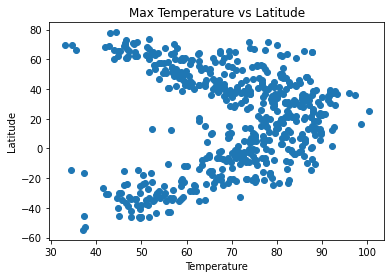

In [78]:
# Plot for max temperature vs latitude
plt.scatter(humidity_dataframe_cleaned["Max Temp"], humidity_dataframe_cleaned["Lat"])
plt.ylabel("Latitude")
plt.xlabel("Temperature")
plt.title("Max Temperature vs Latitude")

Text(0.5, 1.0, 'Humidity vs Latitude')

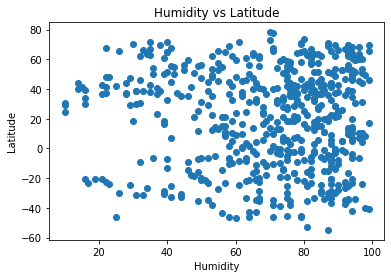

In [79]:
# plot for Humidity vs Latitude
plt.scatter(humidity_dataframe_cleaned["Humidity"], humidity_dataframe_cleaned["Lat"])
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.title("Humidity vs Latitude")

Text(0.5, 1.0, 'Cloudiness vs Latitude')

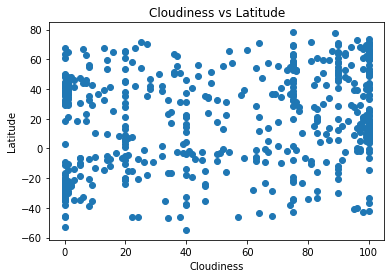

In [80]:
# plot for Cloudiness vs Latitude
plt.scatter(humidity_dataframe_cleaned["Cloudiness"], humidity_dataframe_cleaned["Lat"])
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.title("Cloudiness vs Latitude")

Text(0.5, 1.0, 'Wind Speed vs Latitude')

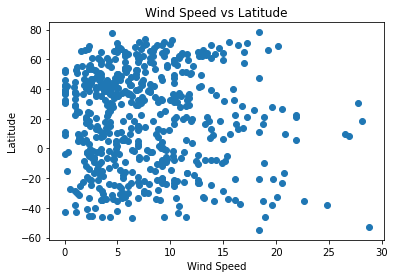

In [81]:
# plot for Wind Speed vs Latitude
plt.scatter(humidity_dataframe_cleaned["Wind Speed"], humidity_dataframe_cleaned["Lat"])
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.title("Wind Speed vs Latitude")

In [82]:
# new dataframe from north hemisphere
northern_df = humidity_dataframe_cleaned.loc[humidity_dataframe_cleaned["Lat"] >= 0.0]
northern_df.reset_index(inplace=True)

Text(0, 0.5, 'Latitude')

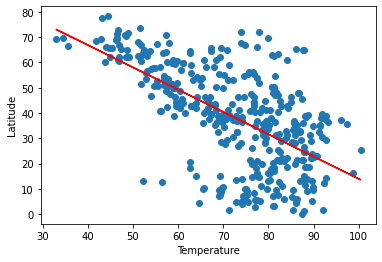

In [83]:
# linear regression for north temperature vs latitude
north_hem_temp = northern_df["Max Temp"]
north_hem_lat = northern_df["Lat"]
slope, int, r, p, std_err = sts.linregress(north_hem_temp, north_hem_lat)
fit = slope * north_hem_temp + int
plt.scatter(northern_df["Max Temp"], northern_df["Lat"])
plt.plot(north_hem_temp, fit, "r-")
plt.xlabel("Temperature")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

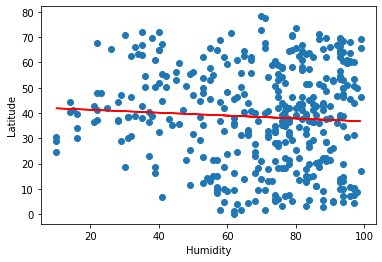

In [84]:
# linear regression for north humidity vs latitude
north_hem_hum = northern_df["Humidity"]
north_hem_lat = northern_df["Lat"]
slope, int, r, p, std_err = sts.linregress(north_hem_hum, north_hem_lat)
fit = slope * north_hem_hum + int
plt.scatter(northern_df["Humidity"], northern_df["Lat"])
plt.plot(north_hem_hum, fit, "r-")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

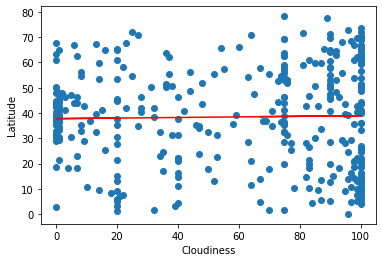

In [85]:
# linear regression for north cloudiness vs latitude
north_hem_clo = northern_df["Cloudiness"]
north_hem_lat = northern_df["Lat"]
slope, int, r, p, std_err = sts.linregress(north_hem_clo, north_hem_lat)
fit = slope * north_hem_clo + int
plt.scatter(northern_df["Cloudiness"], northern_df["Lat"])
plt.plot(north_hem_clo, fit, "r-")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

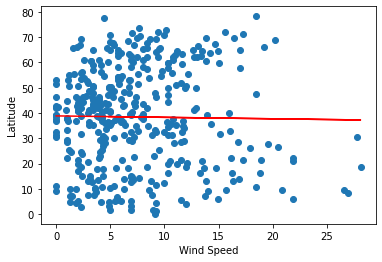

In [86]:
# linear regression for north wind speed vs latitude
north_hem_wind = northern_df["Wind Speed"]
north_hem_lat = northern_df["Lat"]
slope, int, r, p, std_err = sts.linregress(north_hem_wind, north_hem_lat)
fit = slope * north_hem_wind + int
plt.scatter(northern_df["Wind Speed"], northern_df["Lat"])
plt.plot(north_hem_wind, fit, "r-")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

In [87]:
# new dataframe from south
southern_df = humidity_dataframe_cleaned.loc[humidity_dataframe_cleaned["Lat"] < 0.0]
southern_df.reset_index(inplace=True)

Text(0, 0.5, 'Latitude')

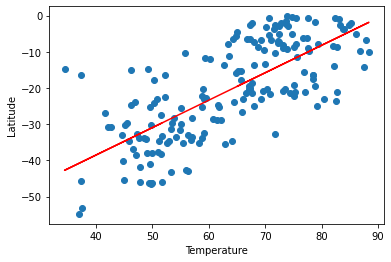

In [88]:
# linear regression for south temperature vs latitude
south_hem_temp = southern_df["Max Temp"]
south_hem_lat = southern_df["Lat"]
slope, int, r, p, std_err = sts.linregress(south_hem_temp, south_hem_lat)
fit = slope * south_hem_temp + int
plt.scatter(southern_df["Max Temp"], southern_df["Lat"])
plt.plot(south_hem_temp, fit, "r-")
plt.xlabel("Temperature")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

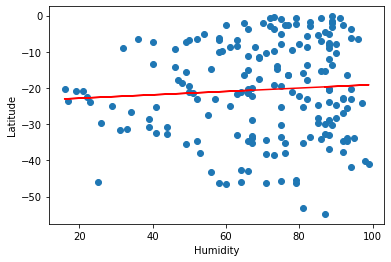

In [89]:
# linear regression for south humidity vs latitude
south_hem_hum = southern_df["Humidity"]
south_hem_lat = southern_df["Lat"]
slope, int, r, p, std_err = sts.linregress(south_hem_hum, south_hem_lat)
fit = slope * south_hem_hum + int
plt.scatter(southern_df["Humidity"], southern_df["Lat"])
plt.plot(south_hem_hum, fit, "r-")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

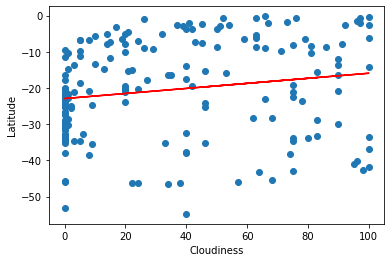

In [90]:
# linear regression for south cloudiness vs latitude
south_hem_cloud =southern_df["Cloudiness"]
south_hem_lat = southern_df["Lat"]
slope, int, r, p, std_err = sts.linregress(south_hem_cloud, south_hem_lat)
fit = slope * south_hem_cloud + int
plt.scatter(southern_df["Cloudiness"], southern_df["Lat"])
plt.plot(south_hem_cloud, fit, "r-")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

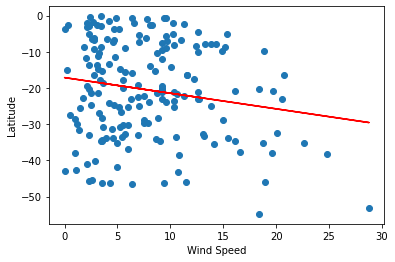

In [91]:
# linear regression for south wind speed vs latitude
south_hem_wind =southern_df["Wind Speed"]
south_hem_lat = southern_df["Lat"]
slope, int, r, p, std_err = sts.linregress(south_hem_wind, south_hem_lat)
fit = slope * south_hem_wind + int
plt.scatter(southern_df["Wind Speed"], southern_df["Lat"])
plt.plot(south_hem_wind, fit, "r-")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")